Validation using in silico simulation can be applied as a stand alone procedure for any assignment. The assignments do not need to be generated by MuSiCal.

In [1]:
import musical
import pickle
import numpy as np
import pandas as pd

Read the input data matrix X and the existing assignment table. Here we are using PCAWG assignment as an example. You can replace the data and assignment to do the same for another dataset and signature assignment.

In [2]:
X = pd.read_csv('data/pcawg/X_CNS.GBM.csv')
H_s = pd.read_csv('data/pcawg/H_CNS.GBM_pcawg.csv')
W_s = pd.read_csv('data/pcawg/W_CNS.GBM_pcawg.csv')

Define a DenovoSig object to run discovery on the dataset and run de novo discovery

In [ ]:
min_n_components = 2
max_n_components = 5
model = musical.DenovoSig(X, 
                          min_n_components = min_n_components, 
                          max_n_components = max_n_components, 
                          init='nndsvdar', 
                          method='mvnmf', 
                          n_replicates=20, 
                          ncpu=10, 
                          mvnmf_lambda_tilde_grid=np.array([1e-10, 1e-9, 5e-9, 1e-8, 5e-8, 1e-7, 2e-7, 5e-7, 1e-6, 2e-6, 5e-6, 1e-5, 2e-5, 5e-5, 1e-4, 2e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1]),mv\
                          nmf_hyperparameter_method='single',
                          conv_test_freq=1000,
                          conv_test_baseline='min-iter',
                          max_iter=100000,
                          bootstrap=True,
                          tol=1e-8, 
                          verbose = 1, 
                          normalize_X = True)
model.fit()

It is better to run the lines above on a cluster. You can either wait for the calculation to finish or download the result from the pickle file which contains the result of the above calculation stored in the data folder:

In [3]:
with open('data/pcawg/musical_output_X_CNS.GBM.pkl', 'rb') as f:
    model = pickle.load(f)

(4, 39)


Plot the discovered signature

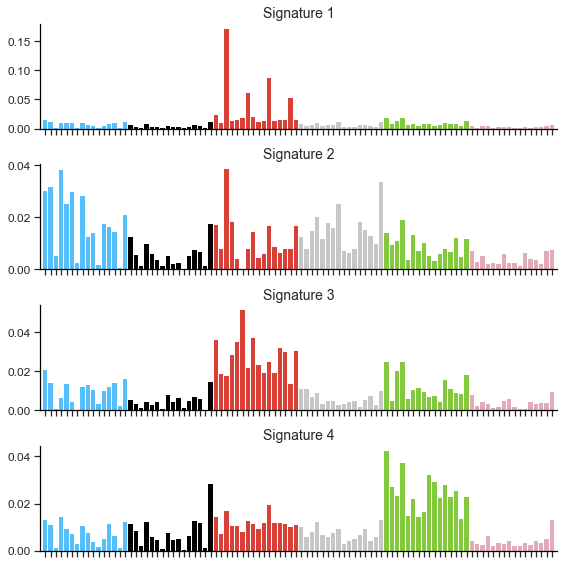

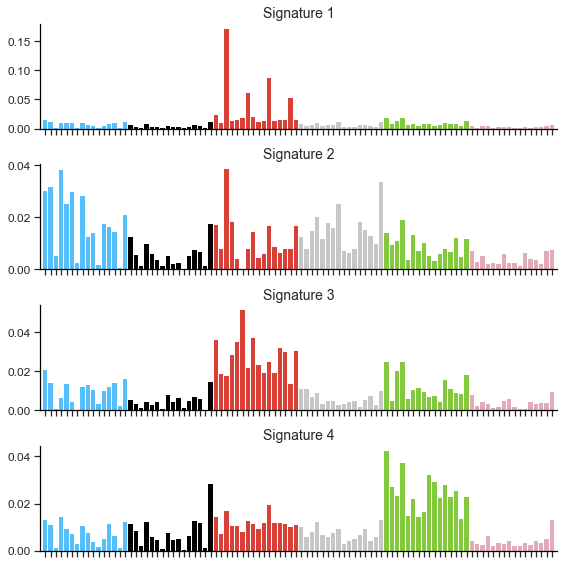

In [5]:
musical.sigplot_bar(model.W)

Add the assignments externally and fix the parameters to match the de novo calculation in data. The assignments will be used to generate simulations and run de novo discovery.

In [13]:
model.n_grid = 1  # there is no grid search for matching and refitting instead we are using an existing assignment                                                                                                                                                
model.H_s = H_s                                                                                                                                                          
model.W_s = W_s           

Run validation

In [ ]:
model.validate_assignment()

Or as before you can find the saved result from the above calculation below:

In [6]:
with open('data/pcawg/musical_output_X_CNS.GBM_validate.pkl', 'rb') as f:
    model = pickle.load(f)

The total distance between de novo signatures from data and simulations:

In [12]:
print(model.dist_W_simul)

{0: array([[0.017494  , 0.34138463, 0.03938763, 0.38622628],
       [0.48260432, 0.17199923, 0.35569949, 0.41318739],
       [0.47881892, 0.22366633, 0.30272774, 0.14123969],
       [0.52667278, 0.32895773, 0.36012984, 0.16329331]]), 1: array([[0.0215646 , 0.25734431, 0.03853862, 0.42060356],
       [0.48693667, 0.19752688, 0.34608869, 0.36695261],
       [0.46332626, 0.29999664, 0.3051976 , 0.11016235],
       [0.51446132, 0.39339337, 0.36739284, 0.14070351]]), 2: array([[0.01904688, 0.29707384, 0.03679202, 0.42172527],
       [0.49110249, 0.18079075, 0.35609718, 0.39436471],
       [0.47888107, 0.25958059, 0.31216526, 0.13118159],
       [0.52628598, 0.36398205, 0.36918817, 0.14403861]])}


print(model.dist_sum_simul)

The distance between de novo signatures from data and simulations for the signature with the largest discrepency

In [8]:
print(model.dist_max_simul)

0.30658399556875393


plot de novo signatures in simulations

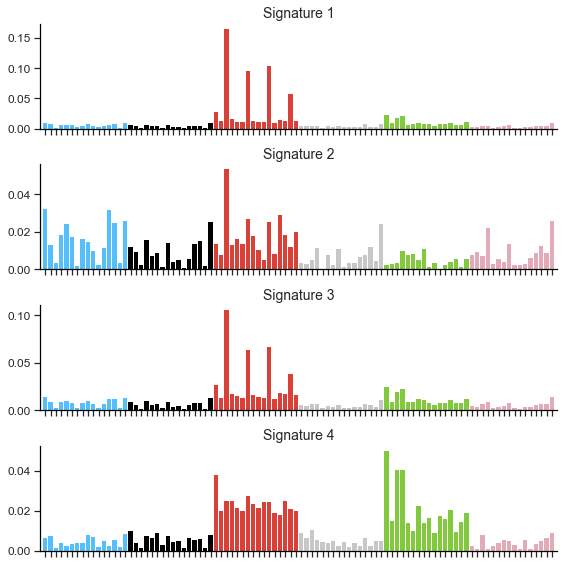

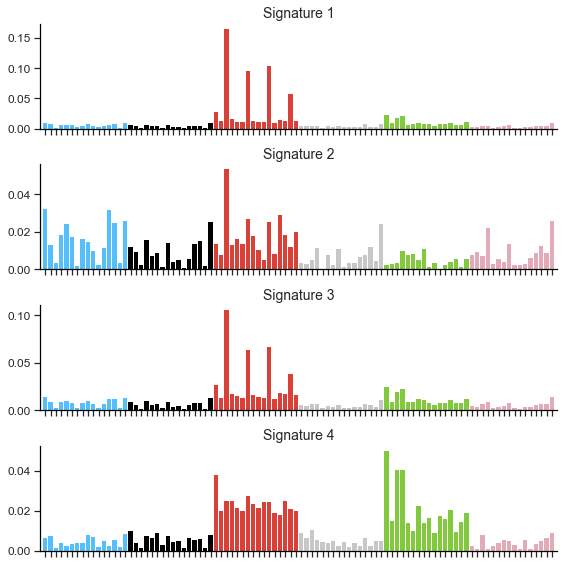

In [10]:
musical.sigplot_bar(model.W_simul)

frobenius norm comparing de novo exposure matrices from data and simulations

In [11]:
print(model.error_H_simul)

120125344.11890759
